In [3]:
import sys, os
import dolfin as df
import numpy as np
import chaospy as cp
import matplotlib as mpl
import matplotlib.pyplot as plt
from os import path
from dolfin import *
import argparse
import scipy.sparse.linalg as spla
from scipy import sparse
from scipy.spatial import distance


casos = ['Python', 'C', 'CUDA']
ext = {'Python': 'py', 'C': 'c', 'CUDA': 'cu'}

cols,rows = 55,15

/home/lamap/.local/lib/python3.10/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


In [4]:
# PLOT MATRIZES

matrixes = ['Q', 'T']
Q = []
T = []
for i in range(len(casos)):
    Q.append(np.loadtxt(f'matrix_Q_{ext[casos[i]]}.txt'))
    T.append(np.loadtxt(f'matrix_T_{ext[casos[i]]}.txt'))

<Figure size 432x288 with 0 Axes>

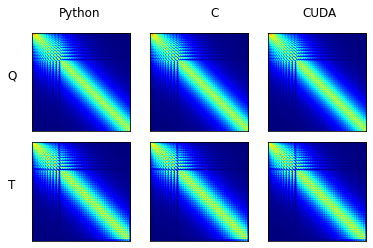

In [5]:
plt.clf()
fig, axs = plt.subplots(len(matrixes), len(casos), sharex=True, sharey=True)
fig.subplots_adjust(hspace=0.02, wspace=0.2)

for i in range(len(casos)):

    im0 = axs[0,i].imshow(Q[i], cmap='jet', origin='upper')
    axs[0,i].set_xticks([])
    axs[0,i].set_yticks([])

    im1 = axs[1,i].imshow(T[i], cmap='jet', origin='upper')
    axs[1,i].set_xticks([])
    axs[1,i].set_yticks([])

    axs[0,i].text(0.7, 1.2, f'{casos[i]}', va='center', ha='right', transform=axs[0,i].transAxes, fontsize=12)

for j, col_label in enumerate(matrixes):
    axs[j,0].text(-0.2, 0.5, matrixes[j], va='bottom', ha='center', transform=axs[j,0].transAxes, fontsize=12)

plt.savefig('mat_comp.pdf', dpi=600)
plt.show()
plt.close()

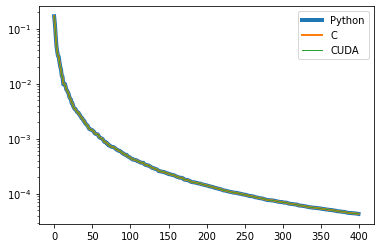

In [6]:
lamb = []
for i in range(len(casos)):
    lamb.append(np.loadtxt(f'eigenvalues_{ext[casos[i]]}.txt'))

# PLOT AUTOVALORES -------------------------------------------------------------
plt.clf()
for i in range(len(casos)):
    plt.semilogy(lamb[i][:400], linewidth=int(4/(i+1)), label=f'{casos[i]}')
plt.legend(loc='best')
plt.savefig('lamb_comp.pdf', dpi=600)
plt.show()
plt.close()

In [7]:
phi = []
for i in range(len(casos)):
    phi.append(np.loadtxt(f'eigenfunctions_{ext[casos[i]]}.txt'))

# PLOT AUTOFUNÇÕES -------------------------------------------------------------

autofunc_view = 8

pt0 = Point(0.0,0.0)
pt1 = Point(3.67,1.0)

mesh = RectangleMesh.create([pt0,pt1], [cols,rows], CellType.Type.quadrilateral)    
VCG1 = FunctionSpace(mesh, "Lagrange", 1)    
VDG0 = FunctionSpace(mesh, "DG", 0)



<Figure size 432x288 with 0 Axes>

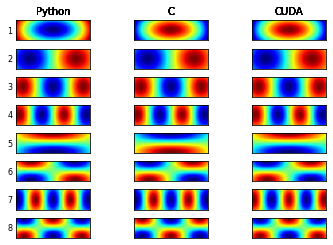

In [10]:
plt.clf()
fig, axs = plt.subplots(autofunc_view, len(casos), sharex=True, sharey=True)
fig.subplots_adjust(hspace=0.4, wspace=0.2)

for i in range(autofunc_view):
    for j, col_label in enumerate(casos):
        md = phi[j]
        mod_c = md[:,i]
        modf_c = Function(VCG1)
        modf_c.vector().set_local(mod_c)
        modfc_c = project(modf_c, VDG0)
        modfc_c_a = modfc_c.vector().get_local()

        im0 = axs[i, j].imshow(modfc_c_a.reshape((rows,cols)), cmap='jet', origin='lower', extent=[0., 3.67, 0, 1])
        axs[i, j].set_xticks([])
        axs[i, j].set_yticks([])

        axs[0, j].text(0.5, 1.2, col_label, va='bottom', ha='center', transform=axs[0, j].transAxes, fontsize=10)

    axs[i, 0].text(-0.05, 0.5, f'{i+1}', va='center', ha='right', transform=axs[i, 0].transAxes, fontsize=8)

plt.savefig('phi_comp.pdf', dpi=600)
plt.show()
plt.close()